7.6
Data on the weekly sales of a major brand of canned tuna by a supermarket chain in a large midwestern U.S. city during a mid-1990s calendar year are contained in the file tuna.dat. There are 52 observations on the variable


- $SAL1=$ unit sales of brand no. 1 canned tuna
- $APR1=$ price per can of brand no. 1 canned tuna
- $APR2, APR3=$  price per can of brands nos. 2 and 3 of canned tuna
- $DISP =$  an indicator variable that takes the value one if there is a store display for brand no. 1 during the week but no newspaper ad; zero otherwise
- $DISPAD=$ an indicator variable that takes the value one if there is a store display and a newspaper ad during the week; zero otherwise

(a) Estimate, by least squares, the log-linear model
$$ \ln (SAL) = \beta_1 + \beta_2 APR1 + \beta_3 APR2 + \beta_4 APR3 + \beta_5 DISP + \beta_6 DISPAD + e $$


In [1]:
clear all
use https://www.stata.com/data/s4poe4/tuna.dta
gen log_sal = ln(sal1)
reg log_sal apr1 apr2 apr3 i.disp i.dispad






      Source |       SS           df       MS      Number of obs   =        52
-------------+----------------------------------   F(5, 46)        =     49.33
       Model |  28.4564198         5  5.69128397   Prob > F        =    0.0000
    Residual |  5.30725263        46  .115375057   R-squared       =    0.8428
-------------+----------------------------------   Adj R-squared   =    0.8257
       Total |  33.7636725        51  .662032793   Root MSE        =    .33967

------------------------------------------------------------------------------
     log_sal |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        apr1 |  -3.746301   .5765177    -6.50   0.000    -4.906771   -2.585831
        apr2 |   1.149494   .4486429     2.56   0.014      .246423    2.052566
        apr3 |   1.288049   .6053247     2.13   0.039     .0695934    2.506504
      1.disp |   .4237441   .1052095     4.03 

(b) Discuss and interpret the estimates of $\beta_2$, $\beta_3$, and $\beta_4$.

As a normal good, the price elasticity of demand is negative. When price of brand 1 goes up, the demand (sales) for it go down. Brand 2 and 3 are substitutes, and as such their cross price elasticities with brand 1 is positive. When their price(s) goes up, brand 1 becomes relatively more attractive, and demand (sales) go up.

(c) Are the signs and relative magnitudes of the estimates of b5 and b6 consistent
with economic logic? Interpret these estimates using the approaches in Sections
7.3.1 and 7.3.2.


$$ \ln(SAL1)_{DISP = 1} - \ln(SAL1)_{DISP = 0} = \beta_5 $$
$$ \ln \Bigg( \frac{ SAL1_{DISP = 1}}{ SAL1_{DISP = 0} }  \Bigg) = \beta_5 \Rightarrow \frac{ SAL1_{DISP = 1}}{ SAL1_{DISP = 0} }  = e^{\beta_5} $$

$$  \frac{ SAL1_{DISP = 1} - SAL1_{DISP = 0}}{ SAL1_{DISP = 0} }  = e^{\beta_5} - 1 $$
The differential for $\beta_5$ is 
$$ 100(e^{\hat{\beta_5}} - 1 ) \% = 100(e^{0.4237441} -1)\% = 52.767061 \%$$
Similarly, the differential for $\beta_6$ is
$$ 100(e^{\hat{\beta_6}} - 1) \% = 100(e^{1.431253} - 1) \% = 318.393838 \%$$


It is surprising that having both an ad and a newspaper would generate such high returns - this implies a $100(\frac{318.39 + 100}{52.77 + 1}-1)\% = 273.876996 \%$ increase if they added an ad in the newspaper for stores that already have a display. This makes some sense - perhaps there are compound effects, those who see both are more likely to go in. At the same time, at some point there would be diminishing returns, since there will be significant overlap between the two groups of people who have seen the ad, and who have seen the store display.

(d) Test, at the $\alpha = 0.05$ level of significance, each of the following hypotheses:
$$ \begin{align}
H_0 &: \beta_5 = 0  && H_1: \beta_5 \neq 0\\
H_0 &: \beta_6 = 0 && H_1 : \beta_6 \neq 0 \\
H_0 &: \beta_5 = 0, \beta_6 = 0 && H_1: \beta_5 \neq 0 \text{ or }\beta_6 \neq 0 \\
H_0 &: \beta_6 \leq \beta_5, &&H_1: \beta_6 > \beta_5 \\
\end{align} $$

In [14]:
di "performed with t-tests and f-tests"
ttest disp == 0  \\ equivalent to testing if the whole variable is significant, as well as t-test
ttest dispad == 0
test 1.disp = 1.dispad = 0 \\ equivalent to testing if the two variables, as a whole, are significant

gen diff = dispad - disp
ttest diff == 0



 ( 1)  1.disp = 0

       F(  1,    46) =   16.22
            Prob > F =    0.0002


 ( 1)  1.dispad = 0

       F(  1,    46) =   84.00
            Prob > F =    0.0000


 ( 1)  1.disp - 1.dispad = 0
 ( 2)  1.disp = 0

       F(  2,    46) =   42.02
            Prob > F =    0.0000


(e) Discuss the relevance of the hypothesis tests in (d) for the supermarket chain’s
executives.

Our conclusion is that 
$$ \beta_6 > \beta_5 > 0$$
Thus we should consider having both newspaper ads and on-store displays. The question is only if the effect size of $\beta_6 - \beta_5$ is going to be worth the difference in price. 

7.15

The data file br2.dat contains data on 1080 house sales in Baton Rouge, Louisiana, during July and August 2005. The variables are $PRICE$ ($\$$), $SQFT$ (total square feet), $BEDROOMS$ (number), $BATHS$ (number), $AGE$ (years), $OWNER$ ($=1$ if occupied by owner; zero if vacant or rented), $POOL$ ($=1$ if present), $TRADITIONAL$ ($=1$ if traditional style; $0$ if other style), $FIREPLACE$ ($=1$ if present), and $WATERFRONT$ ($=1$ if on waterfront).


(a) Compute the data summary statistics and comment. In particular, construct a histogram of PRICE. What do you observe?





    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
       price |      1,080    154863.2    122912.8      22000    1580000
        sqft |      1,080    2325.938    1008.098        662       7897
    bedrooms |      1,080     3.17963    .7094959          1          8
       baths |      1,080    1.973148    .6120669          1          5
         age |      1,080    19.57407    17.19425          1         80
-------------+---------------------------------------------------------
       owner |      1,080    .4888889    .5001081          0          1
        pool |      1,080    .0796296    .2708444          0          1
 traditional |      1,080    .5388889    .4987163          0          1
   fireplace |      1,080     .562963    .4962496          0          1
  waterfront |      1,080    .0722222    .2589754          0          1

(bin=30, start=22000, width=51933.333)


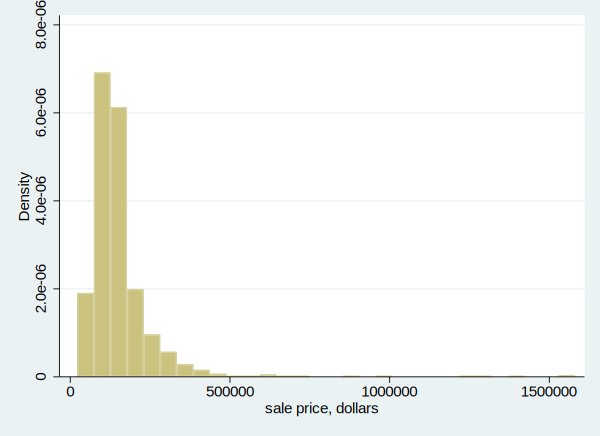

In [28]:
clear all
use https://www.stata.com/data/s4poe4/br2.dta
summarize
hist price

Price is a heavily tailed distribution, with lots of orders of magnitude. we should us logs in order to make differences more comparable.

(b) Estimate a regression model explaining ln(PRICE=1000) as a function of the remaining variables. Divide the variable SQFT by 100 prior to estimation. Comment on how well the model fits the data. Discuss the signs and statistical significance of the estimated coefficients. Are the signs what you expect? Give an exact interpretation of the coefficient of WATERFRONT.

In [30]:
gen lnprice1000 = ln(price / 1000)
gen sqft100 = sqft / 100

reg lnprice1000 sqft100 bedrooms baths age i.owner i.pool i.traditional i.fireplace i.waterfront


      Source |       SS           df       MS      Number of obs   =     1,080
-------------+----------------------------------   F(9, 1070)      =    333.72
       Model |  218.891432         9  24.3212702   Prob > F        =    0.0000
    Residual |  77.9809235     1,070  .072879368   R-squared       =    0.7373
-------------+----------------------------------   Adj R-squared   =    0.7351
       Total |  296.872355     1,079  .275136567   Root MSE        =    .26996

-------------------------------------------------------------------------------
  lnprice1000 |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
      sqft100 |   .0299011   .0014059    21.27   0.000     .0271425    .0326597
     bedrooms |   -.031506   .0166109    -1.90   0.058    -.0640996    .0010875
        baths |    .190119   .0205579     9.25   0.000     .1497807    .2304573
          age |  -.0062145   .0005179   -12.

In [31]:
reg lnprice1000 sqft100 bedrooms baths age i.owner i.pool i.fireplace i.waterfront#i.traditional 


      Source |       SS           df       MS      Number of obs   =     1,080
-------------+----------------------------------   F(10, 1069)     =    302.46
       Model |  219.346722        10  21.9346722   Prob > F        =    0.0000
    Residual |  77.5256335     1,069   .07252164   R-squared       =    0.7389
-------------+----------------------------------   Adj R-squared   =    0.7364
       Total |  296.872355     1,079  .275136567   Root MSE        =     .2693

----------------------------------------------------------------------------------------
           lnprice1000 |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-----------------------+----------------------------------------------------------------
               sqft100 |   .0300308   .0014034    21.40   0.000     .0272771    .0327845
              bedrooms |   -.031333   .0165702    -1.89   0.059    -.0638468    .0011807
                 baths |   .1882577   .0205208     9.17   0.000      .147992   

The signs of sqft100, baths and age make sense and are statistically significant. The bigger the house is, the more baths, and the newer (to some extent - sometimes older is better, but only for specific old/historical houses) it is, the make it should cost. 

- The coefficient for bedrooms, -0.031 however, does not make sense - houses with more bedrooms should be more, not less expensive - but this is not statistically significant at the $5\%$ level, so the model is uncertain, as it should be.
- The coefficient of the dummy variable pool, is uncertain - should houses with pools should be more or less expensive than other houses ceteris paribus? This uncertainty is reflected in the low t-statistic, which is not significant.
- The coefficients for the dummy variables owner, fireplace, and waterfront make sense. Having an owner means someone to take care of the house before it is sold. A fireplace does not take much sqft space and is a nice addition that adds price. Being a waterfront property means the location is nicer and the house is valued more. 
- The coefficient for traditional is significant, and negative, but it is unclear if this makes sense. Are traditional houses worth less because they are older? 'Traditional' has a positive connotation that should imply more expensive, culturally significant homes. Perhaps it would make sense if this variable was further explained, or further discretized in the data collection process.

(c) Create a variable that is the product of $WATERFRONT$ and $TRADITIONAL$. Add this variable to the model and reestimate. What is the effect of adding this variable? Interpret the coefficient of this interaction variable, and discuss its sign and statistical significance.

In [32]:
gen waterfronttraditional = waterfront * traditional
reg lnprice1000 sqft100 bedrooms baths age i.owner i.pool i.fireplace i.waterfront#i.traditional 
reg lnprice1000 sqft100 bedrooms baths age i.owner i.pool i.fireplace i.waterfront i.traditional i.waterfronttraditional




      Source |       SS           df       MS      Number of obs   =     1,080
-------------+----------------------------------   F(9, 1070)      =    333.72
       Model |  218.891432         9  24.3212702   Prob > F        =    0.0000
    Residual |  77.9809235     1,070  .072879368   R-squared       =    0.7373
-------------+----------------------------------   Adj R-squared   =    0.7351
       Total |  296.872355     1,079  .275136567   Root MSE        =    .26996

-------------------------------------------------------------------------------
  lnprice1000 |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
      sqft100 |   .0299011   .0014059    21.27   0.000     .0271425    .0326597
     bedrooms |   -.031506   .0166109    -1.90   0.058    -.0640996    .0010875
        baths |    .190119   .0205579     9.25   0.000     .1497807    .2304573
          age |  -.0062145   .0005179   -1

This variable allows us to further categorize old houses that they next to waterfront properties. This sounds quite strange - expensive waterfront properties tend to be newer. But since traditional houses were seen as a negative, as 'old', this should increase the value 

(d) It is arguable that the traditional-style homes may have a different regression function from the diverse set of nontraditional styles. Carry out a Chow test of the equivalence of the regression models for traditional versus nontraditional styles. What do you conclude?

$$\begin{align}
C &= stuff \\
& = \frac{\left(78.7718812\:-\:\left(44.7413294+31.058155\right)\right)/9}{\left(7413294+31.058155\right)/\left(498+582\:-\:2\left(9\right)\right)\:}
= 0.0004 \\\end{align}$$

In [42]:
reg lnprice1000 i.traditional##c.sqft100 i.traditional##c.bedrooms i.traditional##c.baths i.traditional##c.age i.traditional##i.owner i.traditional##i.pool i.traditional##i.fireplace i.traditional##i.waterfront


      Source |       SS           df       MS      Number of obs   =     1,080
-------------+----------------------------------   F(17, 1062)     =    182.20
       Model |  221.072871        17  13.0042865   Prob > F        =    0.0000
    Residual |  75.7994844     1,062  .071374279   R-squared       =    0.7447
-------------+----------------------------------   Adj R-squared   =    0.7406
       Total |  296.872355     1,079  .275136567   Root MSE        =    .26716

----------------------------------------------------------------------------------------
           lnprice1000 |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-----------------------+----------------------------------------------------------------
         1.traditional |  -.3350838   .0944926    -3.55   0.000    -.5204971   -.1496705
               sqft100 |    .032401   .0018412    17.60   0.000     .0287882    .0360138
                       |
 traditional#c.sqft100 |
                    1  |  -.0

In [49]:
contrast traditional traditional#c.sqft100 traditional#c.bedrooms traditional#c.baths traditional#c.age traditional#i.owner traditional#i.pool traditional#i.fireplace traditional#i.waterfront, overall


Contrasts of marginal linear predictions

Margins      : asbalanced

----------------------------------------------------------
                       |         df           F        P>F
-----------------------+----------------------------------
           traditional |          1       13.10     0.0003
                       |
 traditional#c.sqft100 |          1        3.53     0.0605
                       |
traditional#c.bedrooms |          1        8.69     0.0033
                       |
   traditional#c.baths |          1        0.57     0.4510
                       |
     traditional#c.age |          1        1.56     0.2112
                       |
     traditional#owner |          1        2.76     0.0967
                       |
      traditional#pool |          1        0.14     0.7066
                       |
 traditional#fireplace |          1        2.83     0.0930
                       |
traditional#waterfront |          1        8.48     0.0037
                      

(e) Using the equation estimated in part (d), predict the value of a traditional style house with 2500 square feet of area, that is 20 years old, that is owner-occupied at the time of sale, that has a fireplace, 3 bedrooms, and 2 baths, but no pool, and
that is not on the waterfront.

When traditional,
$$ \begin{align} E \Bigg[ \ln \Big(\frac{PRICE}{1000} \Big) \Bigg] & = (\beta_{cons} +  \theta_{trad}) + \Bigg( (\beta_{sqft1000} + \theta_{trad \times sqft100})SQFT100 + \cdots \Bigg) + \Bigg( (\delta_{owner} + \theta_{trad \times owner}) OWNER + \cdots \Bigg) = f\\
\hat{f}&= (4.067269 - 0.3350838 )  +(0.032401 - 0.0052974)SQFT100 + (-0.0713737 + 0.0989064)bedrooms  + (.1831139 + .0310767)baths + (-.0054674  - 0.0012916)age\\
& + (.0388479 +  .058687)owner + (.0021253 + -.0237596)pool + (.0578017 + .0650471)fireplace + (.172979 + -.2069886)waterfront\\
& =3.7321852 +  (0.0271036)SQFT100+(0.0275327)BEDROOMS+(0.2141906)BATHS+(-0.006759)AGE \\
& + 0.0975349(OWNER)-0.0216343(POOL)+0.1228488(FIREPLACE)-0.0340096(WATEFRONT)\\
& =3.7321852\:+\:\:\left(0.0271036\right)25+\left(0.0275327\right)3+\left(0.2141906\right)2+\left(-0.006759\right)20\: + 0.0975349(1)-0.0216343(0)+0.1228488(1)-0.0340096(0)\\
& = 5.0059582 \\
 E[PRICE] &= e^{5.0059582} * 1000 = 149300.074
\end{align} $$

We expect this to be around 150 grand.